Nodes
[1, 2, 3, 4, 0, 'b', 'e', 'h', 'n', 'a', 'm']
List of edges
[(1, 4), (1, 2), (2, 3), (2, 4), (3, 4)]
Neighbors
Accessing edges
{2: {}, 4: {'weight': 0.125}}
{1: {}, 2: {'weight': 3.1415}, 3: {'weight': 0.125}}
3.1415
(1, 4, 6.000)
(1, 2, 6.000)
(2, 3, 6.000)
(2, 4, 6.000)
(3, 4, 6.000)
shortest path from 1 to 3
[1, 2, 3]


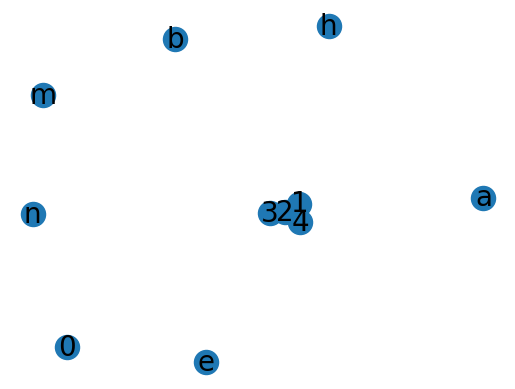

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()

###########################Adding nodes###########################
G.add_node(1)
G.add_nodes_from([2,3,4])

#Add an nbunch: iterable container of nodes  (e.g. a list, set, graph, file, etc..)
H=nx.path_graph(1)
#G now contains the nodes of H as nodes of G. 
G.add_nodes_from(H)
#Graph of Graph
#G.add_node(H)



G.add_node("b")       # adds node "behnam"
G.add_nodes_from("behnam") # adds 6 nodes: 'b','e' ,'h', 'n', 'a','m'


###########################Adding edges###########################
G.add_edge(1, 4)
edge_2_3=(2,3)
G.add_edge(*edge_2_3) # unpack edge tuple with *

#An edge can be associated with any object x using G.add_edge(n1,n2,object=x).
#edge_2_4=(2,4,{'weight':3.1415})

G.add_edge(2,4, weight=3.1415)

G.add_edge(1, 2, weight=4.7 )
G.add_weighted_edges_from([(3,4,0.125)])


###########################Accessing nodes,edges and neighbors###########################
print('Nodes')
print (G.nodes())
print ('List of edges')
print (G.edges())
print ('Neighbors')
print (G.neighbors(1))


#Accessing edges
print ('Accessing edges')
print ((G)[3])
print (G[4])
print (G[4][2]['weight'])


for (u,v,d) in G.edges(data='weight'):
    d=6
    if d>0.5: print('(%d, %d, %.3f)'%(u,v,d))


###########################Adding attributes to nodes###########################
G.add_node(1, time='5pm')
#print (G.node[1])

G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])

###########################Multigraphs###########################
#allow you to add the same edge twice, possibly with different edge data.

MG=nx.MultiGraph()
MG.add_weighted_edges_from([(1,2,.5), (1,2,.75), (2,3,.5)])
MG.degree(weight='weight')

GG=nx.Graph()
for n,nbrs in MG.adjacency():
    for nbr,edict in nbrs.items():
        minvalue=min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)

print ('shortest path from 1 to 3')
print (nx.shortest_path(GG,1,3))



###########################Graph operations###########################
#subgraph(G, nbunch)      - induce subgraph of G on nodes in nbunh
#union(G1,G2)             - graph union
#disjoint_union(G1,G2)    - graph union assuming all nodes are different
#cartesian_product(G1,G2) - return Cartesian product graph
#compose(G1,G2)           - combine graphs identifying nodes common to both
#complement(G)            - graph complement
#create_empty_copy(G)     - return an empty copy of the same graph class
#convert_to_undirected(G) - return an undirected representation of G
#convert_to_directed(G)   - return a directed representation of G

###########################Ploting Graphs ###########################


#nx.draw_spectral(G)
#nx.draw_circular(G)
#nx.draw_random(G)

pos=nx.spring_layout(G) # positions for all nodes
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
nx.draw(G,pos)

plt.show()